In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [89]:
# !pip3 install spacy_langdetect
import numpy as np
import pandas as pd
import seaborn as sns
import re
import os
from tqdm import tqdm 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") 
import missingno as msno
from spacy_langdetect import LanguageDetector
import spacy
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data = pd.read_csv("/content/drive/MyDrive/YouTubeComment/preprocessedcomment.csv")
print(data.shape)
data.head()

(496425, 3)


,user_id,comment,likes
0,Pankaj Rana,"If this year Asus didn't bring us new 5,000 -...",52
1,Alex Shimla,Only samsung was one vendor that was not push...,0
2,Shubham Sanket Swain,Want to know about updates. By the way does t...,0
3,Aniket Kalbhor,Amazing piece of Tech,0
4,Twitch- xjuiceboxtwitch,JUST BOUGHT BLUE 1,1.0


In [4]:
data['length_of_comment'] = data['comment'].apply(lambda x:len(x.split(" ")))      

In [5]:
data['length_of_comment'].value_counts()

6      33210
7      32846
8      31694
5      31436
9      29034
       ...  
269        1
233        1
575        1
218        1
264        1
Name: length_of_comment, Length: 280, dtype: int64

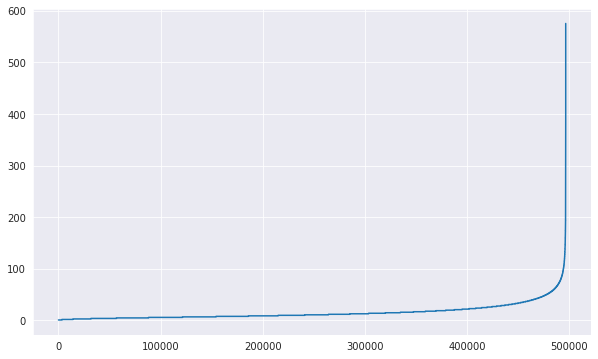

In [6]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
plt.plot(np.sort(data['length_of_comment']))
plt.show()

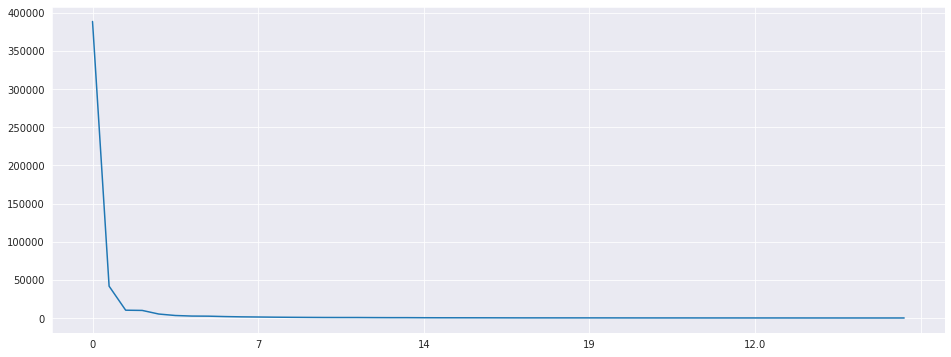

In [101]:
plt.figure(figsize=(16,6))
data['likes'].value_counts().head(50).plot()

In [7]:
def isEnglishComment(comments):
    nlp = spacy.load('en')
    bool_array = []
    for comment in comments:
        doc = nlp(comment)
        detect_language = doc._.language
        if detect_language['language'] =='en' : #or detect_language['score'] >= 0.4:
            bool_array.append(True)
        else:
            bool_array.append(False)

    return np.array(bool_array)

In [8]:
# filt = isEnglishComment(data['comment'])

In [ ]:
data_eng_comment = data[filt]
print(data_eng_comment.shape)
data_eng_comment.head()

In [90]:
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
# nltk.download('stopwords')

SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words('english')


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x

In [91]:
text_corpus = []
for text in tqdm(data['comment'].values):
    text_corpus.append(preprocess(text))

100%|██████████| 496425/496425 [02:45<00:00, 2995.63it/s]


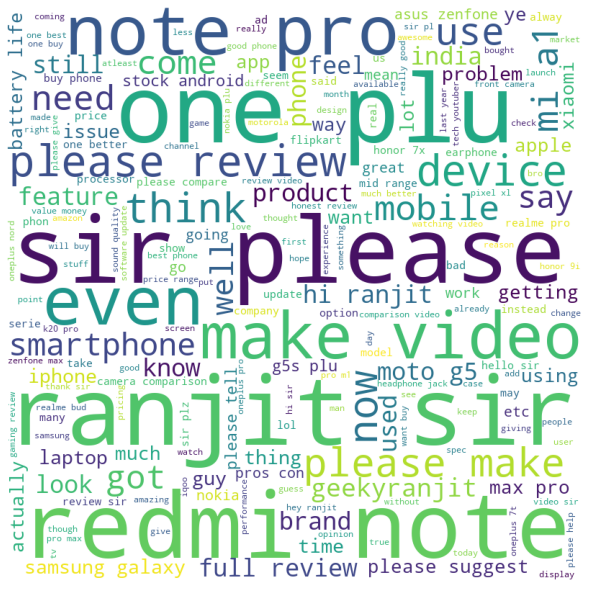

In [92]:
comment_words = ''
stopwords = set(STOPWORDS)
for val in text_corpus:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


### How many comments are for mobile phone?

In [43]:
pattern = re.compile(r'mobile|phone|cell')
mobile_mask = data['comment'].str.contains(pattern) == True
mobile_data = data[mobile_mask]

In [52]:
print("Number of datapoint talking about phones are: {}".format(mobile_data.shape[0]))
mobile_data.head()

Number of datapoint talking about phones are: 96070


,user_id,comment,likes,length_of_comment
0,Pankaj Rana,"If this year Asus didn't bring us new 5,000 -...",52,70
16,Hamaad Salif,flodable phone,0,2
20,Mohak Tyagi,.. He doesn't even want to do the review of th...,0,55
26,All about technology 24x7,450 !! Grow up samsung. Tht experience ui wil...,0,90
34,ARUN Ma,my favorite mobile is Moto now. I am using Mo...,9,16


In [51]:
print(mobile_data.loc[26]['comment'])
# mobile_data.head()

 450 !! Grow up samsung. Tht experience ui will jst get stuck at certain point if time. Talking about service centres, I had an horrible experience when they spoiled my rear cam of my gs7 n later said it was already spoiled while giving it for service. After I showed a photo n a video shoot on same phones rear cam before giving it for service, after looking at the details they agreed their mistake. Also the chief engineer apologized. They fixed it but was not like before. 


In [ ]:
text_corpus = []
for text in tqdm(mobile_data['comment'].values):
    text_corpus.append(preprocess(text))

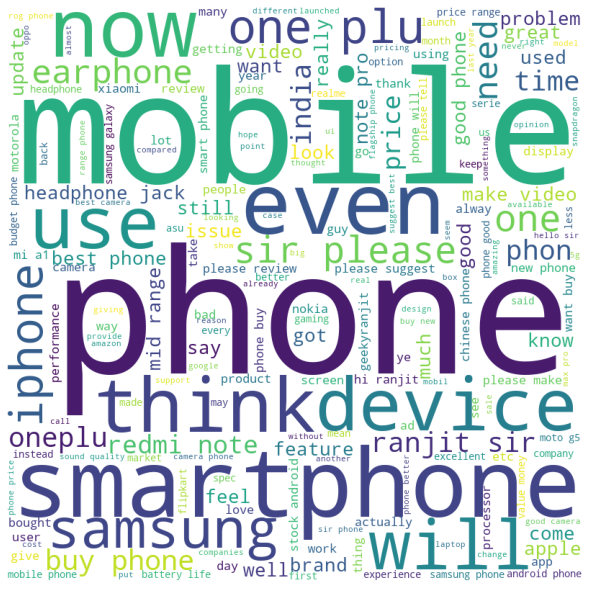

In [84]:
comment_words = ''
stopwords = set(STOPWORDS)
for val in text_corpus:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()


### How many comments are for Computer/laptop phone?

In [56]:
pattern = re.compile(r'pc|comp|lappy|laptop|workstation')
comp_mask = data['comment'].str.contains(pattern)==True
comp_data = data[comp_mask]

In [57]:
print("Number of datapoint talking about phones are: {}".format(comp_data.shape[0]))
comp_data.head()

Number of datapoint talking about phones are: 44488


,user_id,comment,likes,length_of_comment
8,Srinu Srinu,Love you ranjit. I have been following you for...,1,22
10,Sumit Ranjan Singh,awsm review sir.....\nSir I want a comparison ...,1,16
28,TRAVELLERSID21,"For what you said in the start, You earned a...",0,29
66,Tech DEEM,Please review MSI Modern B4M 14 ryzen 5 4500u...,0,13
139,Suman Das,awesomelaptop,0,1


In [98]:
text_corpus = []
for text in tqdm(comp_data['comment'].values):
    text_corpus.append(preprocess(text))

100%|██████████| 44488/44488 [00:14<00:00, 3137.96it/s]


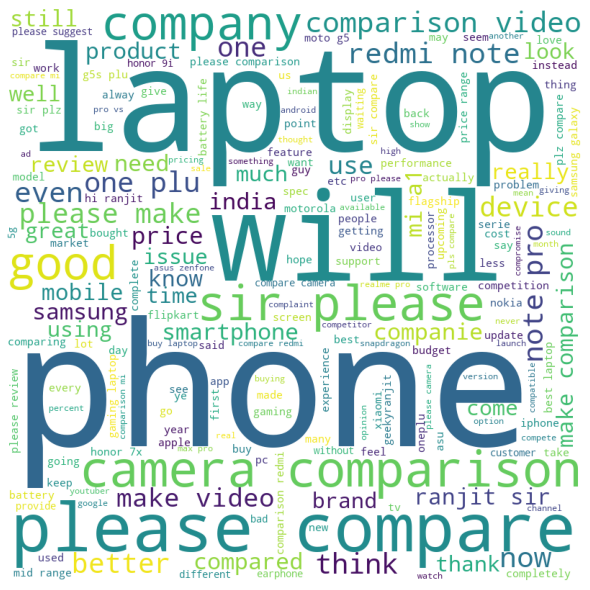

In [99]:
comment_words = ''
stopwords = set(STOPWORDS)
for val in text_corpus:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (10, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()
